In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
df = pd.read_csv('cleaned_ds_glassdoor_jobs.csv')

##### Checking for Multicollinearity

In [ ]:
df_model = df[['avg_salary','Rating','Size','Type of ownership', 'Sector','Revenue',\
               'State','Comp_Age','job_title','Seniority','Same_State','job_descript_lc',\
               'International_HQ','Bachelor','Master','PhD','Python','Sql','Aws','Azure','Scala',\
               'Java','Pyspark','Hadoop','Kafa','Hive','NoSQL','Redshift','Linux','Tableau','Oracle',\
               'Git','Airflow','MySQL','PostgreSQL','Google_Cloud','MongdoDB','Tensorflow','Excel','Matlab',\
               'Keras','Pandas','Javascript','NumPy','Scipy','Pytorch','Xml','PowerBI','Bokeh','Github','Docker',\
               'Scikit','NLP']]

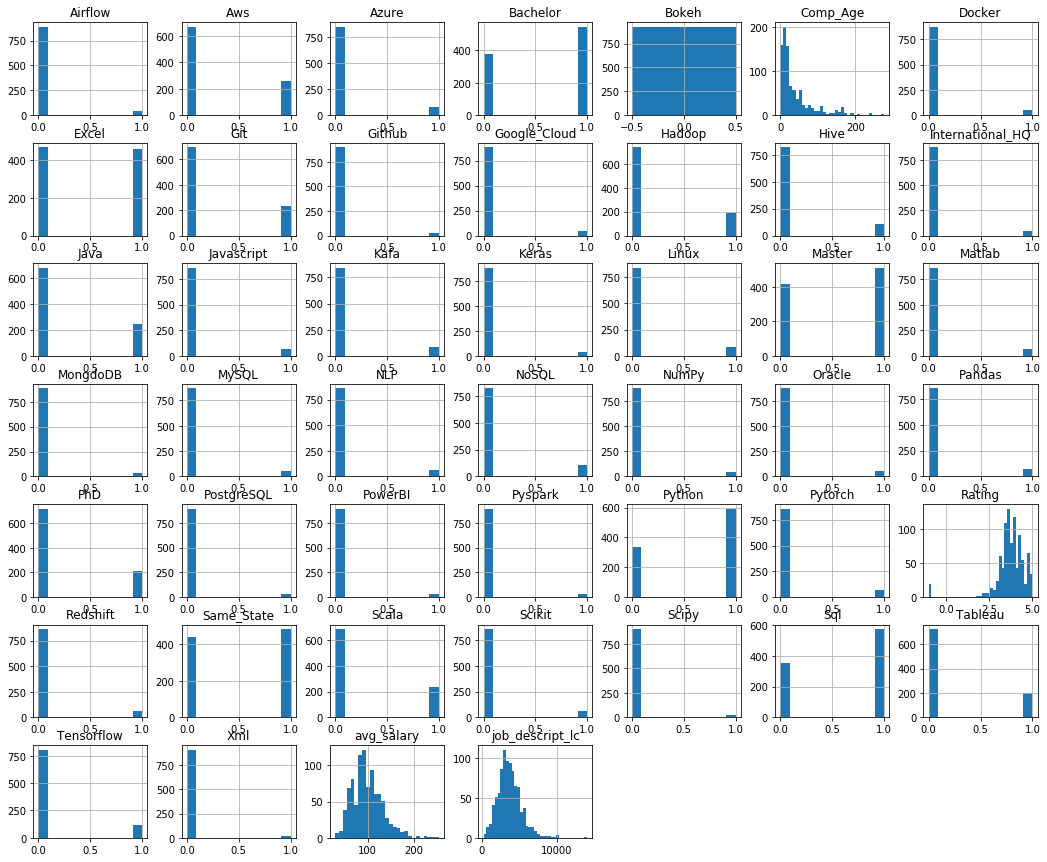

In [15]:
df_model.hist(figsize=(18,15), bins='auto')
plt.show()

As you can see above data is very sparse, hence will facilitate the use of Ridge, Lasso and Random Forest models

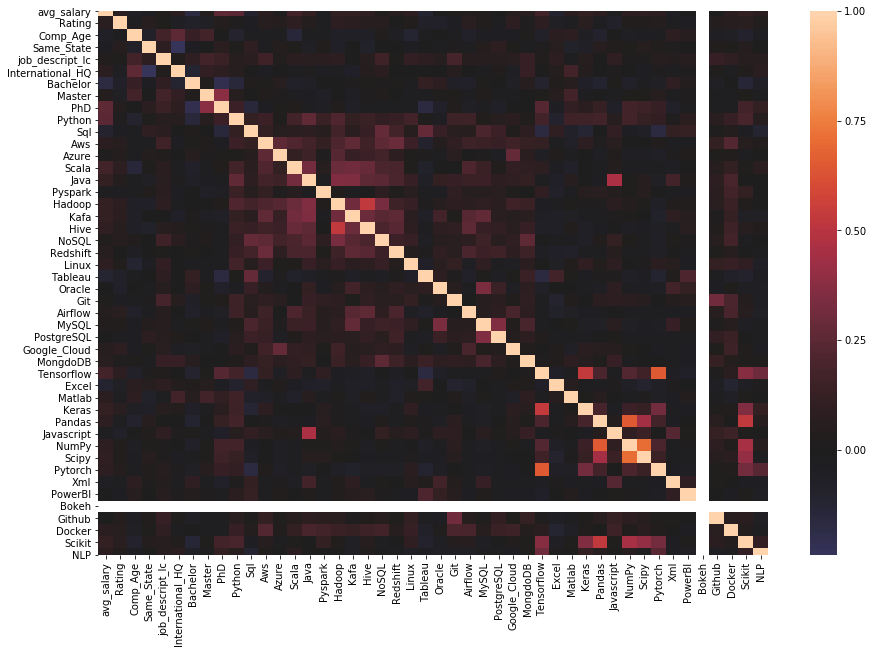

In [18]:
plt.figure(figsize = (15,10))
sns.heatmap(df_model.corr(), center=0)

##### Creating Dummies

In [6]:
df_dum = pd.get_dummies(df_model, drop_first = True)

In [7]:
df_dum.head()

,avg_salary,Rating,Comp_Age,Same_State,job_descript_lc,International_HQ,Bachelor,Master,PhD,Python,...,State_VA,State_VT,State_WA,State_WI,State_WV,job_title_data engineer,job_title_data scientist,job_title_mle,Seniority_2-5 Yrs Experience,Seniority_5+ Yrs Experience
0,126.5,4.1,52,0,3490,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,126.5,3.9,35,1,4376,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,126.5,3.3,84,0,3785,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,126.5,3.8,55,1,5144,0,1,1,1,0,...,0,0,1,0,0,0,1,0,0,0
4,126.5,3.9,109,0,5423,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1


##### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis = 1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

##### Baseline Model

In [111]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, y)
dummy_regr.predict(X)[:10]
#dummy_regr.score(X, y)

array([98.60259179, 98.60259179, 98.60259179, 98.60259179, 98.60259179,
       98.60259179, 98.60259179, 98.60259179, 98.60259179, 98.60259179])

Baseline model provides an average salary of $98,600

In [69]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(dummy_regr.predict(X), y)

25.712773302109916

The baseline model predicts a data science salary on average $25,712.00 off from the actual salary

##### Multiple Linear Regression

Ran a multiple linear regression model for its simplicity and feature interpretability

In [125]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
model.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     4.250
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           3.12e-38
Time:                        15:52:06   Log-Likelihood:                -4288.9
No. Observations:                 926   AIC:                             8854.
Df Residuals:                     788   BIC:                             9520.
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              76.0773     35.622      2.136      0.033       6.152     146.002
Rating                                             -0.0665      1.175     -0.057      0.955      -2.374       2.241
Comp_Age                                            0.0048      0.032      0.153      0.879      -0.057       0.067
Same_State                                         -3.0058      2.238     -1.343      0.180      -7.400       1.388
job_descript_lc                                  6.873e-05      0.001      0.093      0.926      -0.001       0.002
International_HQ                                   -1.5336      5.522     -0.278      0.781     -12.373       9.306
Bachelor                                           -2.9753      2.208     -1.348      0.178      -7.309       1.358
Master                                             -2.1217      2.239     -0.948      0.344      -6.517       2.273
PhD                                                 5.6174      2.988      1.880      0.061      -0.249      11.484
Python                                              2.6469      2.432      1.088      0.277      -2.127       7.421
Sql                                                -1.4116      2.443     -0.578      0.564      -6.207       3.384
Aws                                                -0.8717      2.583     -0.338      0.736      -5.941       4.198
Azure                                              -0.0633      4.143     -0.015      0.988      -8.197       8.070
Scala                                               2.5282      2.605      0.970      0.332      -2.586       7.642
Java                                                0.3114      2.979      0.105      0.917      -5.536       6.158
Pyspark                                           -13.3782      5.954     -2.247      0.025     -25.066      -1.690
Hadoop                                             -3.4249      3.207     -1.068      0.286      -9.720       2.870
Kafa                                                4.3472      4.274      1.017      0.309      -4.043      12.738
Hive                                                4.7852      3.819      1.253      0.211      -2.711      12.282
NoSQL                                              -6.2617      3.634     -1.723      0.085     -13.395       0.871
Redshift                                           -3.5968      4.193     -0.858      0.391     -11.827       4.633
Linux                                               1.9191      3.641      0.527      0.598      -5.228       9.066
Tableau                                            -3.7612      2.735     -1.375      0.169      -9.130       1.608
Oracle                                              0.4132      4.6

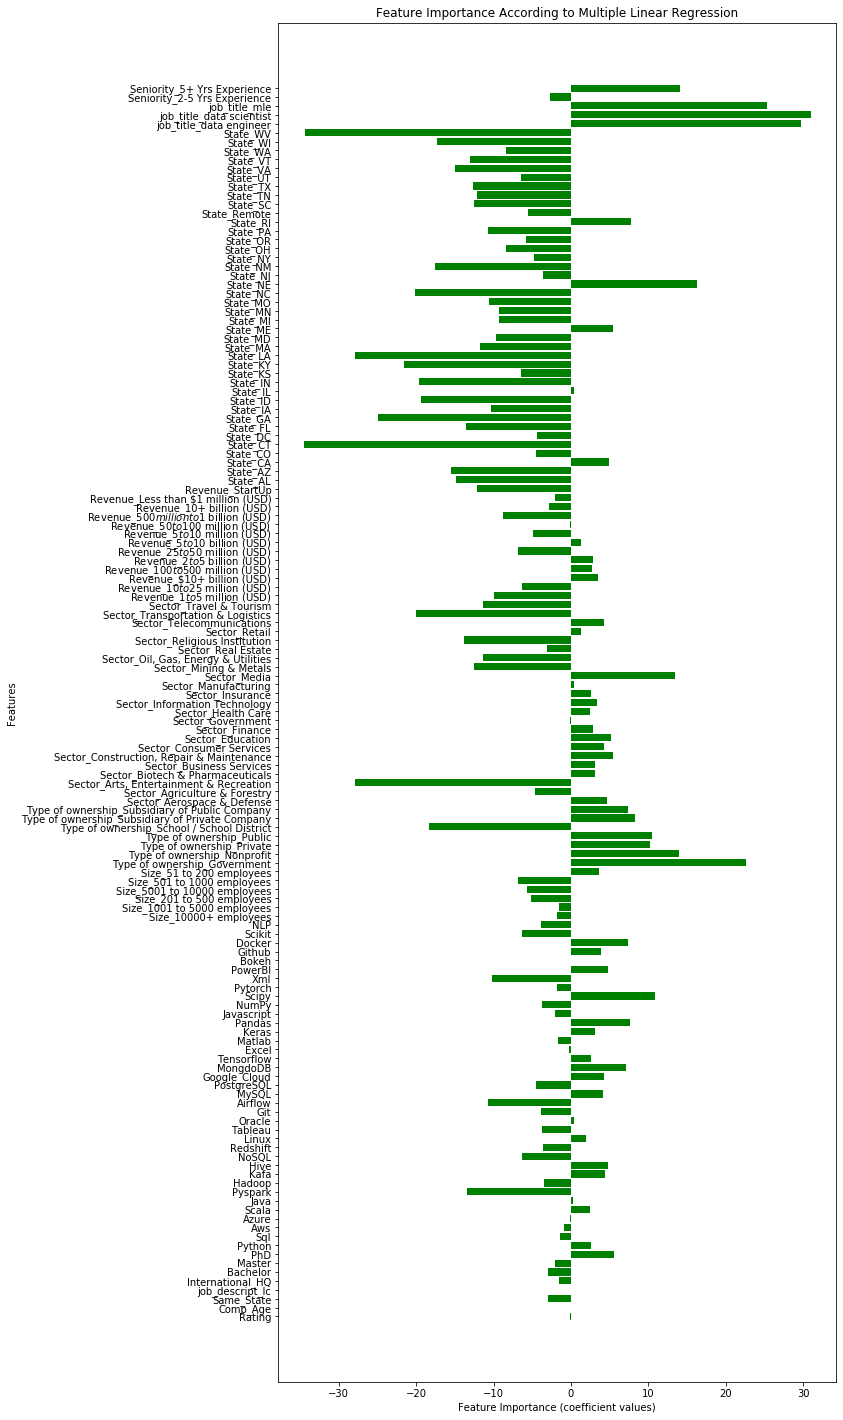

In [148]:
plt.figure(figsize=(10,25))
plt.barh(X.columns[1:], model.params[1:], color='green')
plt.xlabel("Feature Importance (coefficient values)")
plt.ylabel("Features")
plt.title("Feature Importance According to Multiple Linear Regression")
plt.show()

The combination of the OLS summary and feature importance chart reveal that job title, PhD, 5+years of experience are statistitically significant(alpha<0.05) when it comes to having an impact on average salary. All 3 statistically significant features have a positive impact on salary which makes sense. The rest of the features that aren't statistically significant seem to show irrational feature importance (most job location by state, technical skills, revenue have a negative impact on salary) and this seems to be merely due to there not being enough data points ~1,500. (Glassdoor was not friendly with my scraping.) Nevertheless, I will continue to check its predictable value with Multiple Linear Regression, (for a time to where I'll have more data).

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Testing for the optimal cross validation score

In [52]:
cv_num = []
mae = []
for x in range(2,100):
    cv_num.append(x)
    mae.append(np.mean(cross_val_score(lm,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= x)))

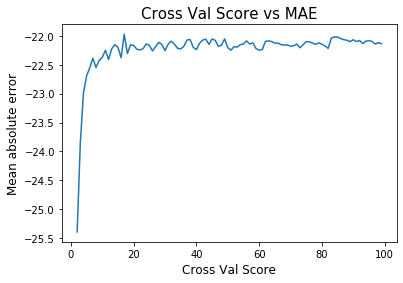

In [66]:
chart = sns.lineplot(x = cv_num, y = mae)
chart.set_xlabel('Cross Val Score', fontsize =12)
chart.set_ylabel('Mean absolute error', fontsize =12)
chart.set_title('Cross Val Score vs MAE', fontsize =15)
plt.show()

Mean absolute error reaches a peak of -22, once it passes the threshold of a cross val score of 20

In [60]:
np.mean(cross_val_score(lm,X_train,y_train,scoring = 'neg_mean_absolute_error', cv=20))

-22.165983006278204

##### Lasso & Ridge

Lasso and Ridge are great models to use when there are many categories containing sparse data, like in my case. They will penalize insignificant variables to have a coefficient of nearly zero. Let's see which coefficients they penalize and check the predictive values of the models measured by mean absolute error.

###### Lasso

In [25]:
from sklearn.linear_model import Lasso, Ridge

In [155]:
lm_l = Lasso(alpha=1)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 20))

-21.169690627841636

Implementing GridSearchCV to find optimal alpha parameter

In [94]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.1,0.2,0.3,0.5,1,5,10,20]}
gs = GridSearchCV(lm_l, parameters, scoring = 'neg_mean_absolute_error', cv=20)
gs.fit(X_train, y_train)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=Lasso(alpha=1, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.5, 1, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [95]:
print(gs.best_score_)
print(gs.best_estimator_)

-20.37443747869665


Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Optimal alpha for lasso is 0.3

In [156]:
lm_l = Lasso(alpha=0.3)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 20))

-20.37443747869665

Checking feature importance

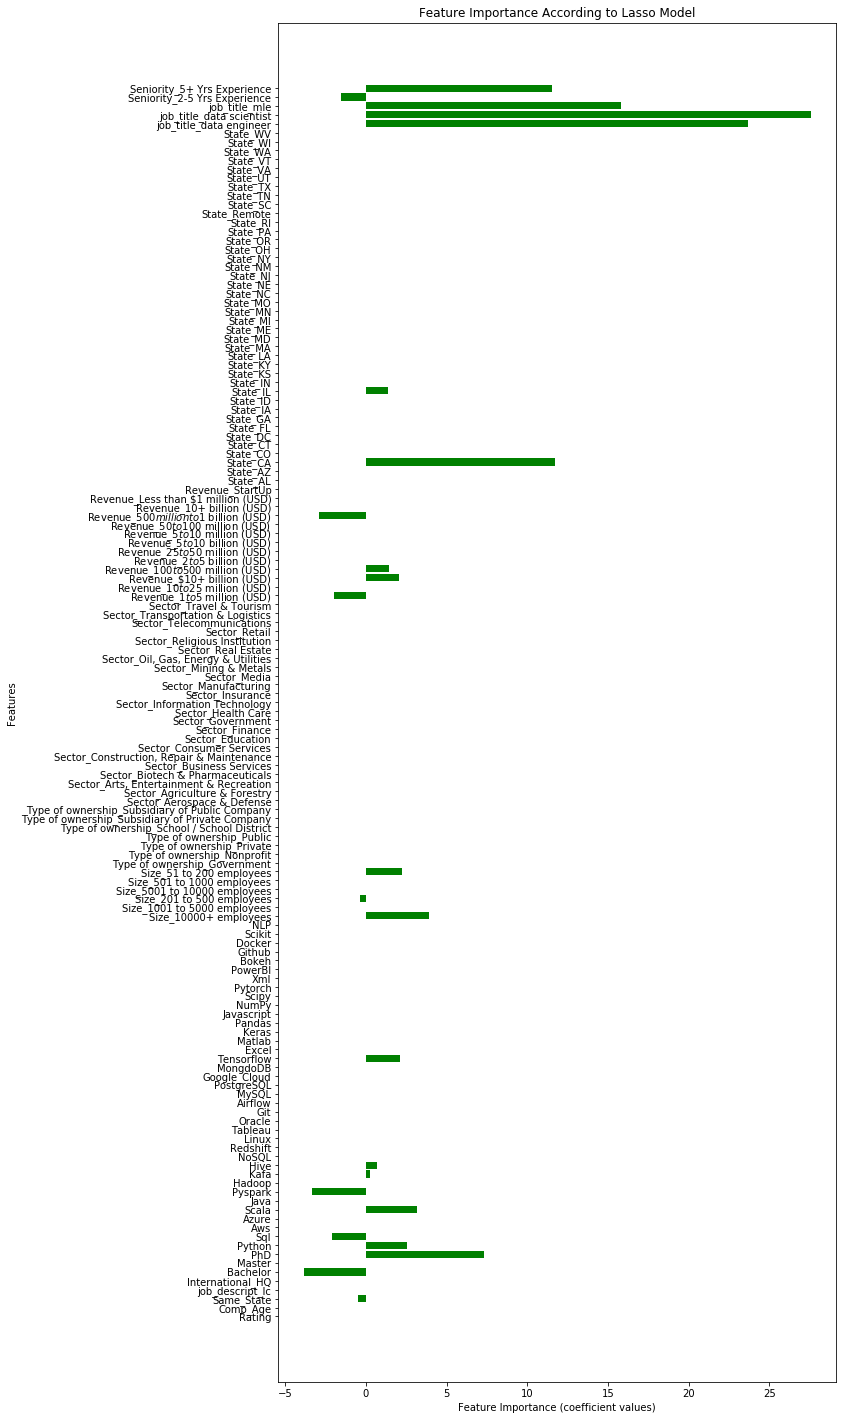

In [166]:
plt.figure(figsize=(10,25))
plt.barh(X.columns[1:], lm_l.coef_, color='green')
plt.xlabel("Feature Importance (coefficient values)")
plt.ylabel("Features")
plt.title("Feature Importance According to Lasso Model")
plt.show()

Lasso gave significance to job titles, years of experience and degrees like the OLS model and similar coeffiecient values as well. After reviewing value counts for the other variables Lasso gave significance to there seems to be the underlying factor that their frequency is higher than the other variables, which is not surprising given the nature of Lasso. This further confirms the need for more data.

###### Ridge

In [29]:
lm_r = Ridge(alpha= 1)
lm_r.fit(X_train,y_train)
np.mean(cross_val_score(lm_r,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 20))

-22.088558646972324

Implementing GridSearchCV to find optimal alpha parameter

In [98]:
parameters = {'alpha':[0.1,0.2,0.3,0.5,1,5,10,20]}
gs = GridSearchCV(lm_r, parameters, scoring = 'neg_mean_absolute_error', cv=20)
gs.fit(X_train, y_train)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=Ridge(alpha=0.13, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.5, 1, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [99]:
print(gs.best_score_)
print(gs.best_estimator_)

-20.88817388480856
Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


Iterating to find optimal alpha parameter

In [100]:
parameters = {'alpha':[20,25,30,50,100]}
gs = GridSearchCV(lm_r, parameters, scoring = 'neg_mean_absolute_error', cv=20)
gs.fit(X_train, y_train)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=Ridge(alpha=0.13, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [20, 25, 30, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [101]:
print(gs.best_score_)
print(gs.best_estimator_)

-20.87029799478219
Ridge(alpha=25, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


Iterating to find optimal alpha parameter

In [102]:
parameters = {'alpha':[20,21,22,23,24,25,26,27,28,29,30]}
gs = GridSearchCV(lm_r, parameters, scoring = 'neg_mean_absolute_error', cv=20)
gs.fit(X_train, y_train)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=Ridge(alpha=0.13, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [103]:
print(gs.best_score_)
print(gs.best_estimator_)

-20.869021786346124
Ridge(alpha=27, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


Optimal alpha parameter for Ridge is 27

In [167]:
lm_r = Ridge(alpha= 27)
lm_r.fit(X_train,y_train)
np.mean(cross_val_score(lm_r,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 20))

-20.869021786346117

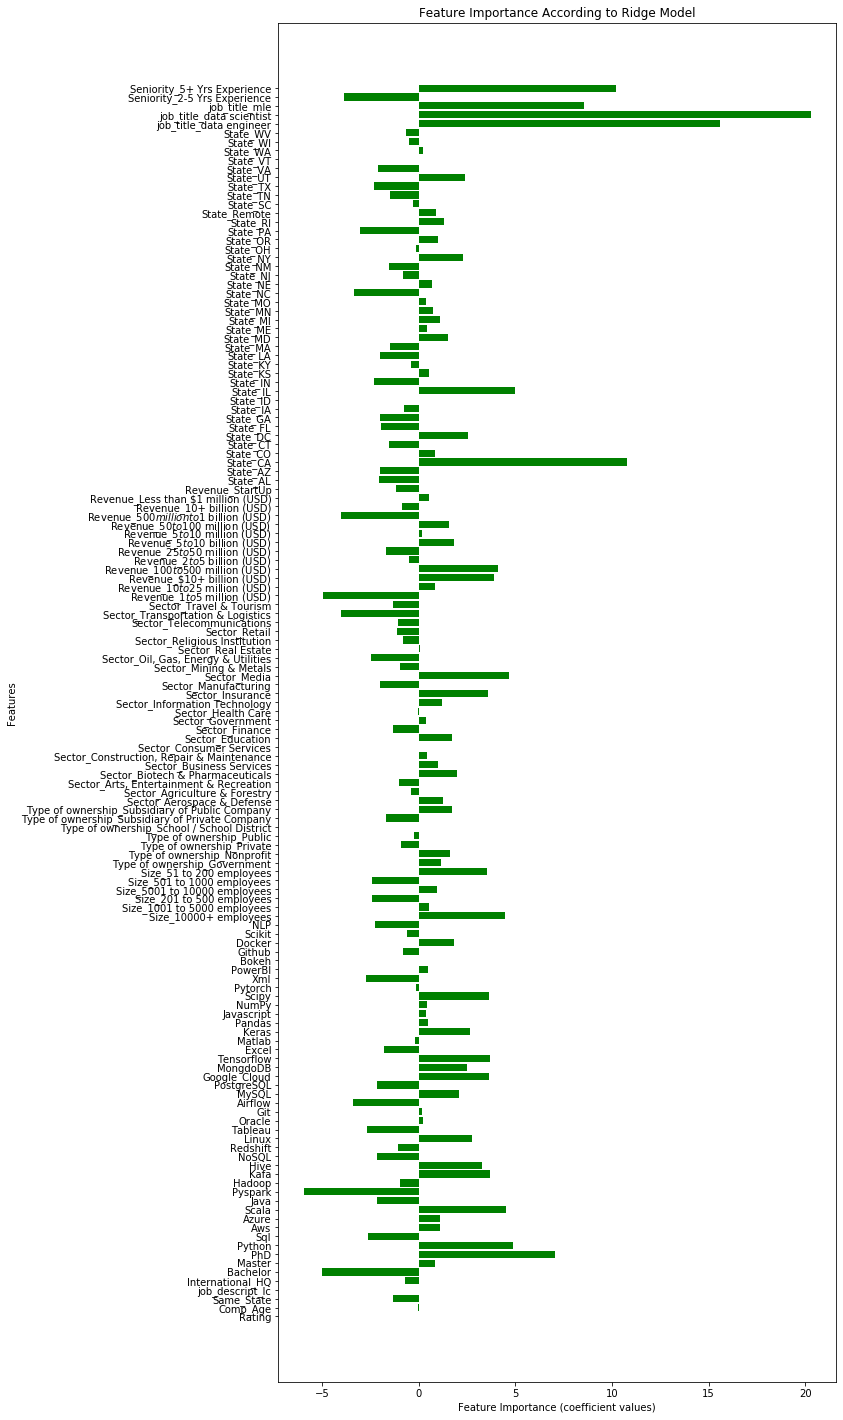

In [168]:
plt.figure(figsize=(10,25))
plt.barh(X.columns[1:], lm_r.coef_, color='green')
plt.xlabel("Feature Importance (coefficient values)")
plt.ylabel("Features")
plt.title("Feature Importance According to Ridge Model")
plt.show()

Interestingly enough, the ridge model creates a similar pattern to the OLS model, but due to the fact that it penalizes sparse data less than lasso and more than the OLS, it does not make most the of the variables totally insignificant, but also it reduces their coefficient effect on the target variable. As you can see the most negative coeffienct is around -5, while for the OLS is -30. Although not as predictive as Lasso, the Ridge model presents itself as the most realistic model for future use due to the fact that I will never achieve attaining perfect data and it penalizes coefficients on a moderate and realistic level.

###### Random Forest Regressor Model

Random Forest was used for ability to handle categorically sparse data and for predictability

In [106]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=20))

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-22.318137387387388

Tuning RandomForest via GridSearchCV

In [109]:
parameters = {'n_estimators' :range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error', cv=20)
gs.fit(X_train, y_train)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mse', 'mae'),
     

In [110]:
print(gs.best_score_)
print(gs.best_estimator_)

-21.054236883942767
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=170,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


###### Pickling Best Model

In [43]:
import pickle
pickl = {'model': lm_l}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

#model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

#list(X_test.iloc[1,:])